<a href="https://colab.research.google.com/github/svkalenichenko/my-projects/blob/main/Project_Deals_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Исследовательский анализ данных (EDA) датасета Deals. Первый взгляд на данные

Рассмотрим основные этапы:

Подключение модулей

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Исходные Данные предоставлены в формате xlsx. Считываем их через Pandas

In [ ]:
deals = pd.read_excel('/content/Deals (Done).xlsx', skipfooter=2)  # skipfooter=2 пропускает последние битые строки, которые не видны  в Экселе
#pd.set_option('display.float_format', '{:.0f}'.format)  # раскрывает Столбец ID полностью все числа
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,2000,5.805028e+18,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN


Получение общего представления о
данных

In [ ]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21593 entries, 0 to 21592
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  int64  
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3299 non-null   object 
 15  Created Time         21593 non-null 

In [ ]:
deals.describe()

,Id,Course duration,Months of study,Contact Name
count,2.159300e+04,3587.000000,840.000000,2.153200e+04
mean,5.805028e+18,10.198495,5.442857,5.805028e+18
std,1.569713e+07,1.834681,2.919920,1.584464e+07
min,5.805028e+18,6.000000,0.000000,5.805028e+18
25%,5.805028e+18,11.000000,3.000000,5.805028e+18
50%,5.805028e+18,11.000000,5.000000,5.805028e+18
75%,5.805028e+18,11.000000,8.000000,5.805028e+18
max,5.805028e+18,11.000000,11.000000,5.805028e+18


Преобразование необработанных данных

In [ ]:
# Преобразование строк в даты с временем и только с датой
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'], format='%d.%m.%Y', errors='coerce', dayfirst=True)
deals['Created Time'] = pd.to_datetime(deals['Created Time'], format='%d.%m.%Y %H:%M', errors='coerce', dayfirst=True)

In [ ]:
# from datetime import datetime
#deals['Closing Date'].fillna(pd.Timestamp(datetime.now()), inplace=True)

# Заменяю пустые значения в Столбце Closing Dat самой последнй датой какая есть в этом столбце
# deals['Closing Date'] = deals['Closing Date'].fillna(pd.to_datetime('2024-01-01'))

In [ ]:
deals.describe()

,Id,Closing Date,Created Time,Course duration,Months of study,Contact Name
count,2.159300e+04,14645,21593,3587.000000,840.000000,2.153200e+04
mean,5.805028e+18,2024-01-27 16:37:43.489245440,2024-01-27 01:44:13.334877184,10.198495,5.442857,5.805028e+18
min,5.805028e+18,2022-10-11 00:00:00,2023-07-03 17:03:00,6.000000,0.000000,5.805028e+18
25%,5.805028e+18,2023-11-11 00:00:00,2023-11-18 13:33:00,11.000000,3.000000,5.805028e+18
50%,5.805028e+18,2024-02-07 00:00:00,2024-02-05 07:46:00,11.000000,5.000000,5.805028e+18
75%,5.805028e+18,2024-04-17 00:00:00,2024-04-13 19:19:00,11.000000,8.000000,5.805028e+18
max,5.805028e+18,2024-12-11 00:00:00,2024-06-21 15:30:00,11.000000,11.000000,5.805028e+18
std,1.569713e+07,NaN,NaN,1.834681,2.919920,1.584464e+07


Количество отсутствующих значений

In [ ]:
# deals.isnull().sum()
deals.isna().sum()

,0
Id,0
Deal Owner Name,29
Closing Date,6948
Quality,2253
Stage,0
Lost Reason,5469
Page,0
Campaign,5526
SLA,6060
Content,7446


In [ ]:
# Создаём столбец в процентном соотношении сколько пустых  значений
(deals.isnull().sum()/(len(deals)))*100

,0
Id,0.000000
Deal Owner Name,0.134303
Closing Date,32.177094
Quality,10.433937
Stage,0.000000
Lost Reason,25.327652
Page,0.000000
Campaign,25.591627
SLA,28.064651
Content,34.483397


Количество уникальных и дублированных значений

In [ ]:
deals.nunique()

,0
Id,21593
Deal Owner Name,27
Closing Date,359
Quality,6
Stage,13
Lost Reason,21
Page,34
Campaign,154
SLA,13357
Content,187


Проверяем есть ли в данных полностью повторяющиеся строки

In [ ]:
deals[deals.duplicated()] # тут Дублей нет

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch


In [ ]:
deals.duplicated().sum()

0

Преобразование
данных
включает в себя их сокращение, корректировку и
дополнение на основе имеющихся

In [ ]:
# Переименование столбцов Content на  'Ad', 'Term' на 'AdGroup, выяснила что это теже самые Столбцы что и в Датасете Spend
deals = deals.rename(columns={'Content': 'Ad', 'Term': 'AdGroup'})

In [ ]:
# Переименование столбцов Initial Amount Paid' на  'Initial_Amount_Paid', 'Offer Total Amount' на 'Offer_Total_Amount, что бы можно было к ним корректно обратиться
deals = deals.rename(columns={'Initial Amount Paid': 'Initial_Amount_Paid', 'Offer Total Amount': 'Offer_Total_Amount'})

In [ ]:
deals.Offer_Total_Amount.unique()

array([nan, 2000, 9000, 11000, 3500, 4500, '€ 2.900,00', 6500, 4000, 3000,
       10000, 2500, 5000, 11500, 1, 1000, 1200, 0, 1500, '€ 11398,00',
       11111, 6000], dtype=object)

In [ ]:
deals.Initial_Amount_Paid.unique()

array([nan, 0, 1000, '€ 3.500,00', 500, 100, 4500, 300, 200, 2000, 11000,
       4000, 3000, 3500, 11500, 1200, 1500, 1, 5000, 600, 700, 350, 9,
       400, 450], dtype=object)

In [ ]:
# Функция для очистки данных
def clean_value(x):
    if isinstance(x, str):
        x = x.replace('€', '').replace('.', '').replace(',', '.').strip()
    try:
        return float(x)   # Пробуем преобразовать к float
    except:
        return np.nan   # Если не удается преобразовать, возвращаем NaN

# Применяем очистку данных к столбцам  'Initial_Amount_Paid' и 'Offer_Total_Amount'
deals[['Initial_Amount_Paid', 'Offer_Total_Amount']] = deals[['Initial_Amount_Paid', 'Offer_Total_Amount']].apply(lambda x: x.apply(clean_value))

In [ ]:
# Преобразовываем Столбецы Initial_Amount_Paid', 'Offer_Total_Amount в числовые
deals[['Initial_Amount_Paid', 'Offer_Total_Amount']] = deals[['Initial_Amount_Paid', 'Offer_Total_Amount']].apply(pd.to_numeric, errors='coerce').astype('Int32')

In [ ]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21593 entries, 0 to 21592
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21593 non-null  int64         
 1   Deal Owner Name      21564 non-null  object        
 2   Closing Date         14645 non-null  datetime64[ns]
 3   Quality              19340 non-null  object        
 4   Stage                21593 non-null  object        
 5   Lost Reason          16124 non-null  object        
 6   Page                 21593 non-null  object        
 7   Campaign             16067 non-null  object        
 8   SLA                  15533 non-null  object        
 9   Ad                   14147 non-null  object        
 10  AdGroup              12454 non-null  object        
 11  Source               21593 non-null  object        
 12  Payment Type         496 non-null    object        
 13  Product              3592 non-n

In [ ]:
# Удаление только первого слэша в каждой строке столбца Page
deals['Page'] = deals['Page'].str.replace('^/', '', n=1, regex=True)

In [ ]:
# Создание нового столбца Quality_Initial с первой буквой
deals['Quality_Initial'] = deals['Quality'].str[0]

In [ ]:
# Удаление буквы, пробела, тире и ещё одного пробела в столбце Quality
deals['Quality'] = deals['Quality'].str.replace(r'^[A-Z]\s-\s', '', regex=True)

In [ ]:
# Определение 10 самых популярных городов:
top_cities = deals['City'].value_counts().nlargest(10).index
deals['City_Top'] = deals['City'].where(deals['City'].isin(top_cities), 'Other')

In [ ]:
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Ad,...,Created Time,Course duration,Months of study,Initial_Amount_Paid,Offer_Total_Amount,Contact Name,City,Level of Deutsch,Quality_Initial,City_Top
0,5805028000056864695,Ben Hall,NaT,NaN,New Lead,NaN,eng/test,03.07.23women,NaN,v16,...,2024-06-21 15:30:00,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,NaN,Other
1,5805028000056859489,Ulysses Adams,NaT,NaN,New Lead,NaN,at-eng,NaN,NaN,NaN,...,2024-06-21 15:23:00,6.0,NaN,0,2000,5.805028e+18,NaN,NaN,NaN,Other
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,at-eng,engwien_AT,00:26:43,b1-at,...,2024-06-21 14:45:00,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,D,Other
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,2024-06-21 13:32:00,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,E,Other
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,eng,discovery_DE,00:53:12,website,...,2024-06-21 13:21:00,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,D,Other


In [ ]:
deals['City_Top'].unique()

array(['Other', 'Dortmund', 'München', 'Berlin', 'Dresden', '-',
       'Nürnberg', 'Düsseldorf', 'Leipzig', 'Hamburg', 'Frankfurt'],
      dtype=object)

In [ ]:
# Извлекаем уровень языка:
import re

# Функция для извлечения уровня языка
def extract_level(text):
    # Проверка, является ли текст строкой
    if isinstance(text, str):
        # Приводим текст к верхнему регистру для унификации
        text = text.upper()
        match = re.search(r'\b(A1|A2|B1|B2|C1)\b', text)
        return match.group(0) if match else None
    return None  # Если это не строка, возвращаем None

# Применение функции к столбцу "Level of Deutsch"
deals['Deutsch_Level'] = deals['Level of Deutsch'].apply(extract_level)

# Замена None на "Не указано"
deals['Deutsch_Level'] = deals['Deutsch_Level'].fillna('Unknown')

# Просмотр результатов
print(deals[['Level of Deutsch', 'Deutsch_Level']])

      Level of Deutsch Deutsch_Level
0                  NaN       Unknown
1                  NaN       Unknown
2                  NaN       Unknown
3                  NaN       Unknown
4                  NaN       Unknown
...                ...           ...
21588              NaN       Unknown
21589              NaN       Unknown
21590              NaN       Unknown
21591              NaN       Unknown
21592              NaN       Unknown

[21593 rows x 2 columns]


In [ ]:
deals['Deutsch_Level'].nunique()

6

In [ ]:
deals.Deutsch_Level.unique()

array(['Unknown', 'A2', 'B1', 'B2', 'A1', 'C1'], dtype=object)

In [ ]:
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Ad,...,Course duration,Months of study,Initial_Amount_Paid,Offer_Total_Amount,Contact Name,City,Level of Deutsch,Quality_Initial,City_Top,Deutsch_Level
0,5805028000056864695,Ben Hall,NaT,NaN,New Lead,NaN,eng/test,03.07.23women,NaN,v16,...,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,NaN,Other,Unknown
1,5805028000056859489,Ulysses Adams,NaT,NaN,New Lead,NaN,at-eng,NaN,NaN,NaN,...,6.0,NaN,0,2000,5.805028e+18,NaN,NaN,NaN,Other,Unknown
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,at-eng,engwien_AT,00:26:43,b1-at,...,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,D,Other,Unknown
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,E,Other,Unknown
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,eng,discovery_DE,00:53:12,website,...,NaN,NaN,<NA>,<NA>,5.805028e+18,NaN,NaN,D,Other,Unknown


In [ ]:
# Преобразование столбцов в категориальные
cat_cols = ['Deal Owner Name', 'Quality', 'Stage', 'Lost Reason', 'Page', 'Campaign', 'Ad', 'AdGroup', 'Source', 'Payment Type', 'Product', 'Education Type', 'City', 'Level of Deutsch', 'Quality_Initial', 'City_Top']
deals[cat_cols] = deals[cat_cols].astype('category')

In [ ]:
# Преобразование Столбцов в числовые
num_cols =  ['Course duration', 'Months of study', 'Contact Name']

# Применяем pd.to_numeric к каждому столбцу отдельно
for col in num_cols:
    deals[col] = pd.to_numeric(deals[col], errors='coerce').astype('Int64')

In [ ]:
# Обход по всем категориальным столбцам
for col in cat_cols:
    if deals[col].dtype.name == 'category':  # Проверяем, что столбец категориальный
        # Проверяем, есть ли уже категория 'Unknown'
        if 'Unknown' not in deals[col].cat.categories:
            # Добавляем категорию 'Unknown', если ее нет
            deals[col] = deals[col].cat.add_categories(['Unknown'])

    # Заменяем пропущенные значения на 'Unknown'
    deals[col] = deals[col].fillna('Unknown')

In [ ]:
# Заполнение пропущенных значений в числовых Столбцах на медианное значение
median_columns = ['Course duration', 'Months of study', 'Initial_Amount_Paid', 'Offer_Total_Amount']
for col in median_columns:
    deals[col] = deals[col].fillna(deals[col].median())

In [ ]:
deals['SLA'].isnull().sum()

6060

In [ ]:
# Преобразование столбца SLA в формат timedelta и замена пустых значений на 0
import datetime

def convert_time_to_timedelta(x):
    if pd.isna(x):  # Проверка на пустые значения (NaN, NaT, None) и замена их на 0
        return pd.Timedelta(0)
    elif isinstance(x, pd.Timestamp):
        return pd.to_timedelta(x - pd.Timestamp(0))  # Преобразуем Timestamp в timedelta
    elif isinstance(x, datetime.time):
        return pd.to_timedelta(datetime.datetime.combine(datetime.date.today(), x) - pd.Timestamp(0))  # Преобразуем time в timedelta
    else:
        return pd.to_timedelta(x, errors='coerce')  # Оставляем NaT для некорректных значений

# Применяем функцию к столбцу SLA
deals['SLA'] = deals['SLA'].apply(convert_time_to_timedelta)

In [ ]:
# Удаляем строки с пропусками в Столбце Contact Name
deals = deals.dropna(subset=['Contact Name'])

Проверяем данные после всех изменений

In [ ]:
print(deals.isnull().sum())
deals.info()
deals.head()

Id                        0
Deal Owner Name           0
Closing Date           6927
Quality                   0
Stage                     0
Lost Reason               0
Page                      0
Campaign                  0
SLA                       0
Ad                        0
AdGroup                   0
Source                    0
Payment Type              0
Product                   0
Education Type            0
Created Time              0
Course duration           0
Months of study           0
Initial_Amount_Paid       0
Offer_Total_Amount        0
Contact Name              0
City                      0
Level of Deutsch          0
Quality_Initial           0
City_Top                  0
Deutsch_Level             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 21532 entries, 0 to 21592
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Id                   21532 non-nul

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Ad,...,Course duration,Months of study,Initial_Amount_Paid,Offer_Total_Amount,Contact Name,City,Level of Deutsch,Quality_Initial,City_Top,Deutsch_Level
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,eng/test,03.07.23women,0 days 00:00:00,v16,...,11,5,1000,11000,5805028000056849408,Unknown,Unknown,Unknown,Other,Unknown
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,at-eng,Unknown,0 days 00:00:00,Unknown,...,6,5,0,2000,5805028000056834048,Unknown,Unknown,Unknown,Other,Unknown
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,at-eng,engwien_AT,20011 days 00:26:43,b1-at,...,11,5,1000,11000,5805028000056854528,Unknown,Unknown,D,Other,Unknown
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,eng,04.07.23recentlymoved_DE,20011 days 01:00:04,bloggersvideo14com,...,11,5,1000,11000,5805028000056888320,Unknown,Unknown,E,Other,Unknown
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,eng,discovery_DE,20011 days 00:53:12,website,...,11,5,1000,11000,5805028000056876032,Unknown,Unknown,D,Other,Unknown


Вывод описательных статистик

In [ ]:
deals.describe(include='all').T  # переворачиваем наоборот Таблицу (Столбцы стали Строками)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Id,21532.0,NaN,NaN,NaN,5805028000030074880.0,5805028000000921600.0,5805028000017623040.0,5805028000030143488.0,5805028000043753472.0,5805028000056893440.0,15708307.202805
Deal Owner Name,21532,28,Charlie Davis,2952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closing Date,14605,NaN,NaN,NaN,2024-01-27 17:52:31.879493120,2022-10-11 00:00:00,2023-11-11 00:00:00,2024-02-08 00:00:00,2024-04-17 00:00:00,2024-12-11 00:00:00,NaN
Quality,21532,7,Non Qualified,7619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,21532,13,Lost,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lost Reason,21532,22,Unknown,5453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Page,21532,34,eng,5812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign,21532,153,Unknown,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLA,21532,NaN,NaN,NaN,12657 days 00:06:18.402377984,0 days 00:00:00,0 days 00:00:00,20011 days 00:44:44.500000,20011 days 06:43:44.249999872,20011 days 23:58:39,9647 days 09:07:18.171879040
Ad,21532,188,Unknown,7388,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Категориальные переменные:**

## Столбец Deal Owner Name:
28 уникальных значений. Наиболее частый владелец — Charlie Davis, который владеет 2952 сделками.

## Столбец Quality:
7 уникальных значений. Наиболее частая категория — Non Qualified (7619).
Lost Reason: 22 уникальных значений, Unknown (5453).


## Столбец Campaign:
153 уникальных значений, Unknown (5473).


## **Числовые переменные:**

## Столбецы Initial Amount Paid и Offer Total Amount:
Оба столбца имеют средние значения (990,43 и 10250,87 соответственно) и максимальные значения, которые значительно выше. Это может указывать на наличие выбросов или значительных различий в значениях.

## Столбец Months of Study:
Среднее значение составляет 5,02 месяцев, с некоторыми записями, указывающими на 11 месяцев, что также может указывать на наличие выбросов.

## Выводы:

Высокий процент "Non Qualified" сделок указывает на необходимость улучшения качества лидов и их сегментации. Значительное пустых значений "Unknown". Высокие средние значения "Initial Amount Paid" и "Offer Total Amount" могут свидетельствовать о наличии выбросов; требуется анализ структуры ценообразования. Средняя продолжительность обучения в 5.02 месяца говорит о необходимости улучшения обучающих материалов и поддержки клиентов.

Данные готовы к дальнейшему анализу, сохраняем в  файл и скачиваем себе на комп что б не потерять их

In [ ]:
import pickle

In [ ]:
# Сохранение DataFrame в файл с помощью pickle
with open('deals.pkl', 'wb') as f:
    pickle.dump(deals, f)

Открываем и проверяем всё ли корректно сохранилось и открывается ли

In [ ]:
# Загрузка DataFrame из файла с помощью pickle
with open('deals.pkl', 'rb') as f:
    deals = pickle.load(f)

In [ ]:
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Ad,...,Course duration,Months of study,Initial_Amount_Paid,Offer_Total_Amount,Contact Name,City,Level of Deutsch,Quality_Initial,City_Top,Deutsch_Level
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,eng/test,03.07.23women,0 days 00:00:00,v16,...,11,5,1000,11000,5805028000056849408,Unknown,Unknown,Unknown,Other,Unknown
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,at-eng,Unknown,0 days 00:00:00,Unknown,...,6,5,0,2000,5805028000056834048,Unknown,Unknown,Unknown,Other,Unknown
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,at-eng,engwien_AT,20011 days 00:26:43,b1-at,...,11,5,1000,11000,5805028000056854528,Unknown,Unknown,D,Other,Unknown
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,eng,04.07.23recentlymoved_DE,20011 days 01:00:04,bloggersvideo14com,...,11,5,1000,11000,5805028000056888320,Unknown,Unknown,E,Other,Unknown
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,eng,discovery_DE,20011 days 00:53:12,website,...,11,5,1000,11000,5805028000056876032,Unknown,Unknown,D,Other,Unknown


In [ ]:
print(deals.isnull().sum())
deals.info()

Id                        0
Deal Owner Name           0
Closing Date           6927
Quality                   0
Stage                     0
Lost Reason               0
Page                      0
Campaign                  0
SLA                       0
Ad                        0
AdGroup                   0
Source                    0
Payment Type              0
Product                   0
Education Type            0
Created Time              0
Course duration           0
Months of study           0
Initial_Amount_Paid       0
Offer_Total_Amount        0
Contact Name              0
City                      0
Level of Deutsch          0
Quality_Initial           0
City_Top                  0
Deutsch_Level             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 21532 entries, 0 to 21592
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Id                   21532 non-nul

In [ ]:
# deals.to_excel('Deals_saved.xlsx', index=False)   # index=False предотвращает запись индексов DataFrame в файл

In [ ]:
# deals = pd.read_excel('/content/Deals_saved.xlsx')
# deals.head()

In [ ]:
# deals.to_hdf('Deals.h5', key='df', mode='w')
# deals = pd.read_hdf('Deals.h5', key='df')

Одномерный анализ

Распределение данных в каждом столбце

In [ ]:
cat_cols=deals.select_dtypes(include=['category']).columns.tolist()   # категориальные столбцы
num_cols = deals.select_dtypes(include=np.number).columns.tolist()   # числовые столбцы

# [*data.select_dtypes(include=['object']).columns]    можно распаковывать через звёздочку будет тоже счамое

print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Deal Owner Name', 'Quality', 'Stage', 'Lost Reason', 'Page', 'Campaign', 'Ad', 'AdGroup', 'Source', 'Payment Type', 'Product', 'Education Type', 'City', 'Level of Deutsch', 'Quality_Initial', 'City_Top']
Numerical Variables:
['Id', 'SLA', 'Course duration', 'Months of study', 'Initial_Amount_Paid', 'Offer_Total_Amount', 'Contact Name']


Визуализация числовых переменных

In [ ]:
# Убрала предупреждения о поведение функции, которая может измениться в будущем, но это не ошибка
import warnings

warnings.filterwarnings("ignore")

Id


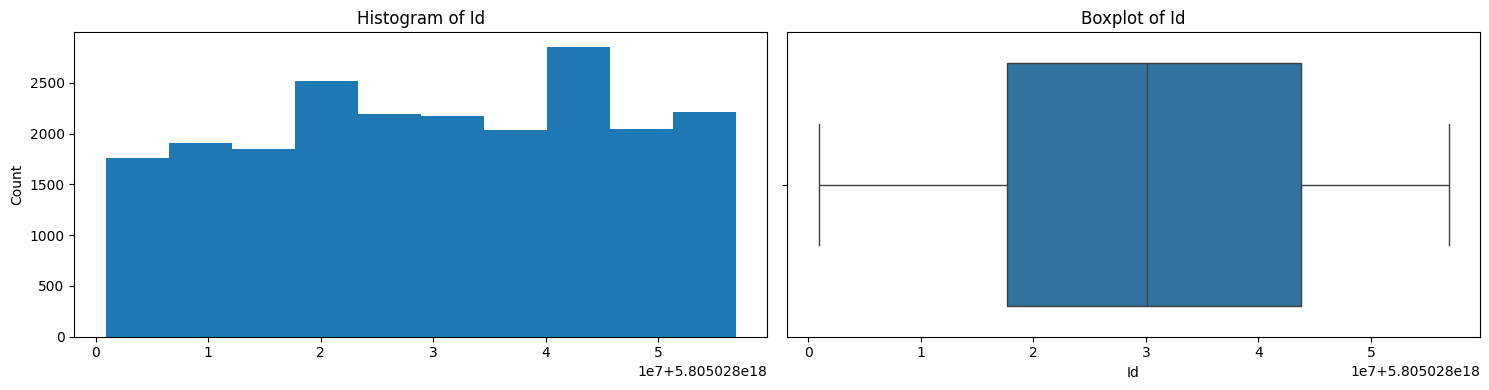

Skipping non-numeric column: SLA
Course duration


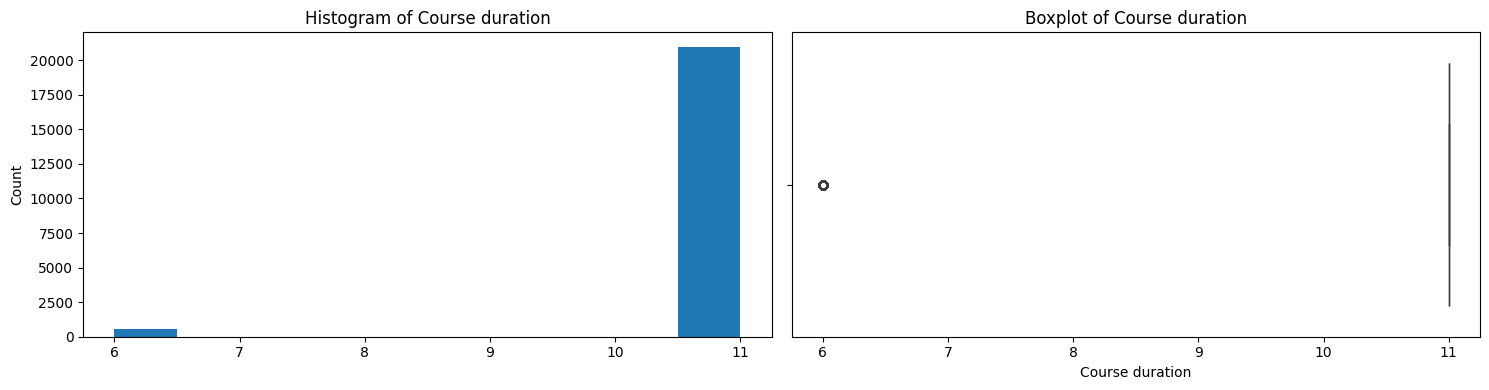

Months of study


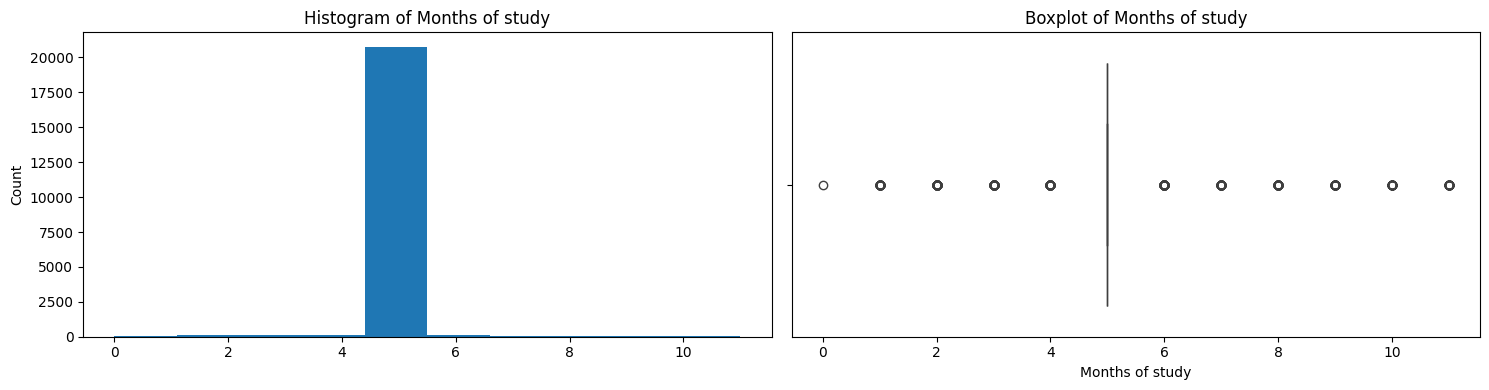

Initial_Amount_Paid


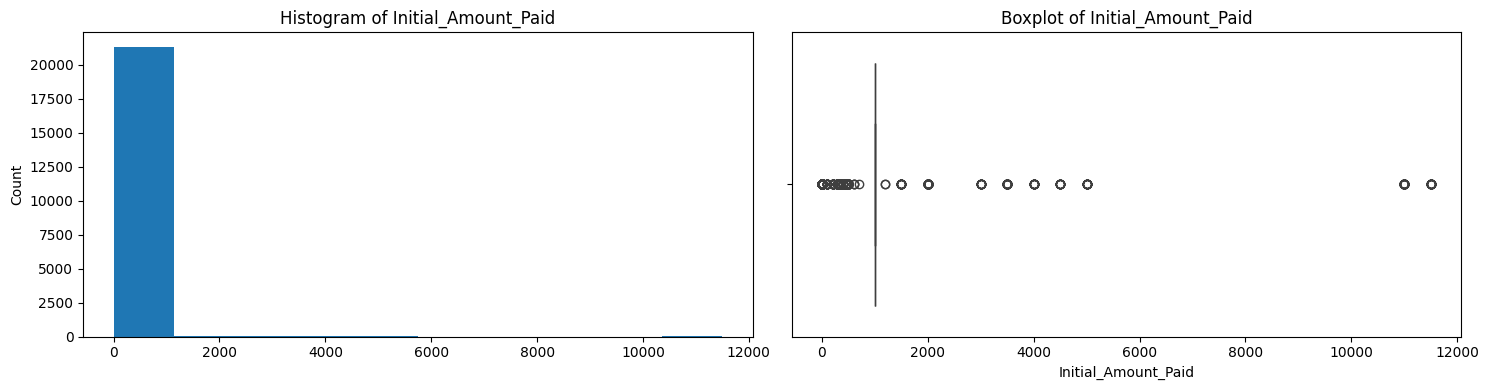

Offer_Total_Amount


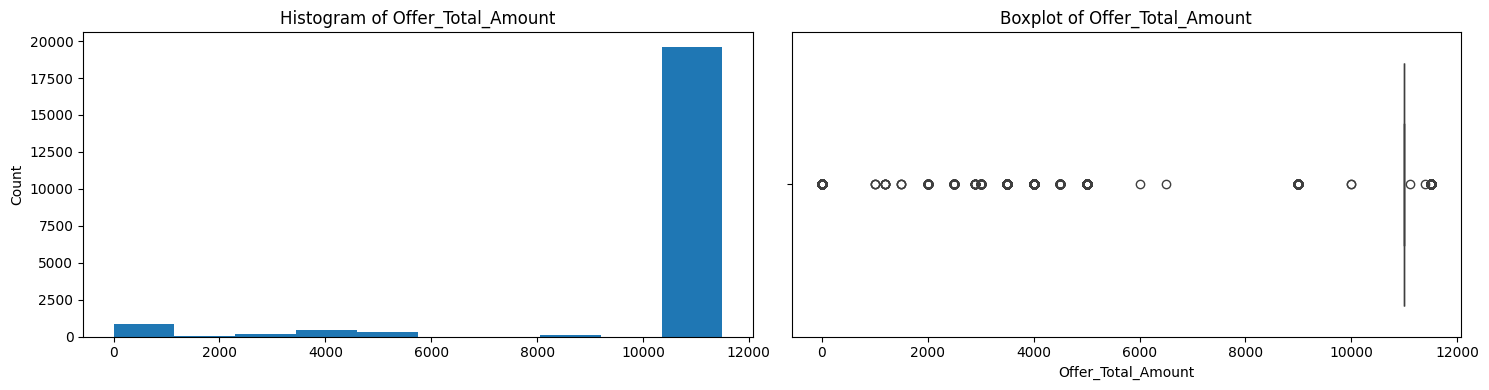

Contact Name


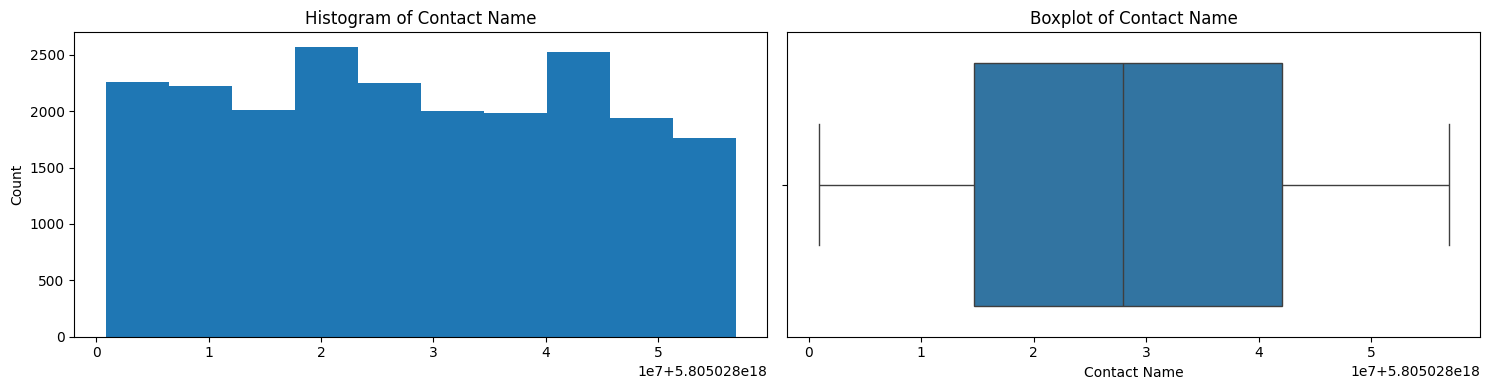

In [ ]:
for col in num_cols:  # цикл для каждого столбца
    if pd.api.types.is_numeric_dtype(deals[col]):  # Проверка на числовой тип данных
        print(col)
        plt.figure(figsize=(15, 4))  # Размер фигуры для каждого графика

        # Гистограмма для текущего столбца
        plt.subplot(1, 2, 1)  # 1 строка, 2 колонки, 1-я ячейка
        deals[col].hist(grid=False)
        plt.ylabel('Count')
        plt.title(f'Histogram of {col}')

        # Боксплот для текущего столбца
        plt.subplot(1, 2, 2)  # 1 строка, 2 колонки, 2-я ячейка
        sns.boxplot(x=deals[col])
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()  # Оптимизация отступов
        plt.show()
    else:
        print(f"Skipping non-numeric column: {col}")

Логарифмическое преобразование

In [ ]:
# Если сильная ассиметрия в Столбцах тогда мы их Логарифмируем
for colname in ['Offer_Total_Amount','Initial_Amount_Paid', 'Months of study', 'Course duration']:
    deals[colname + '_log'] = np.log1p(deals[colname])

Offer_Total_Amount_log


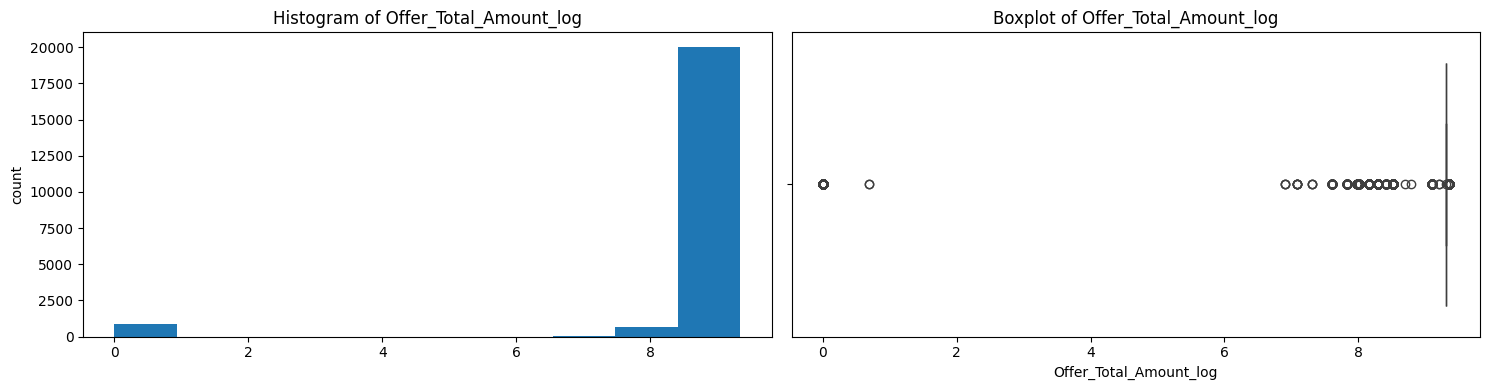

Initial_Amount_Paid_log


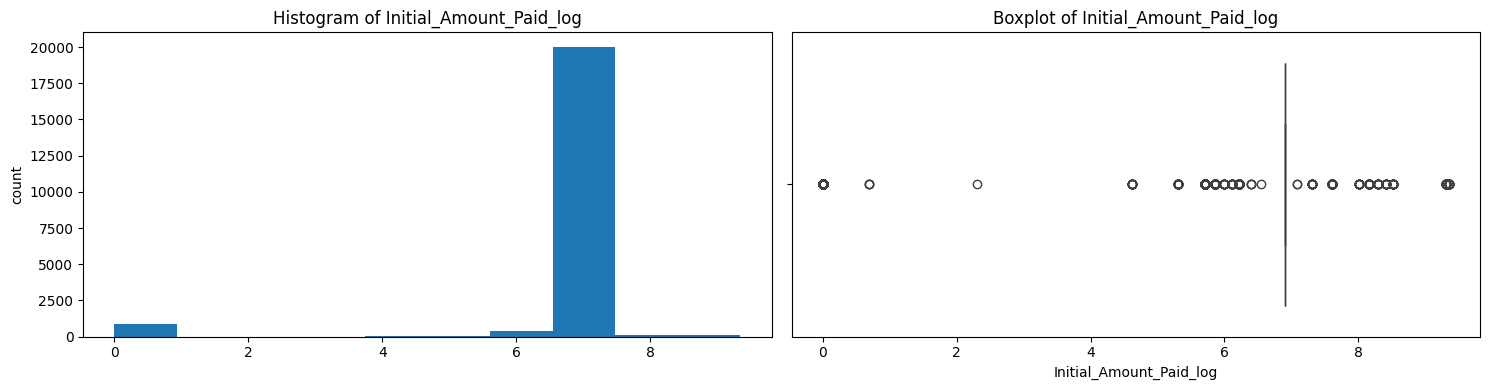

Months of study_log


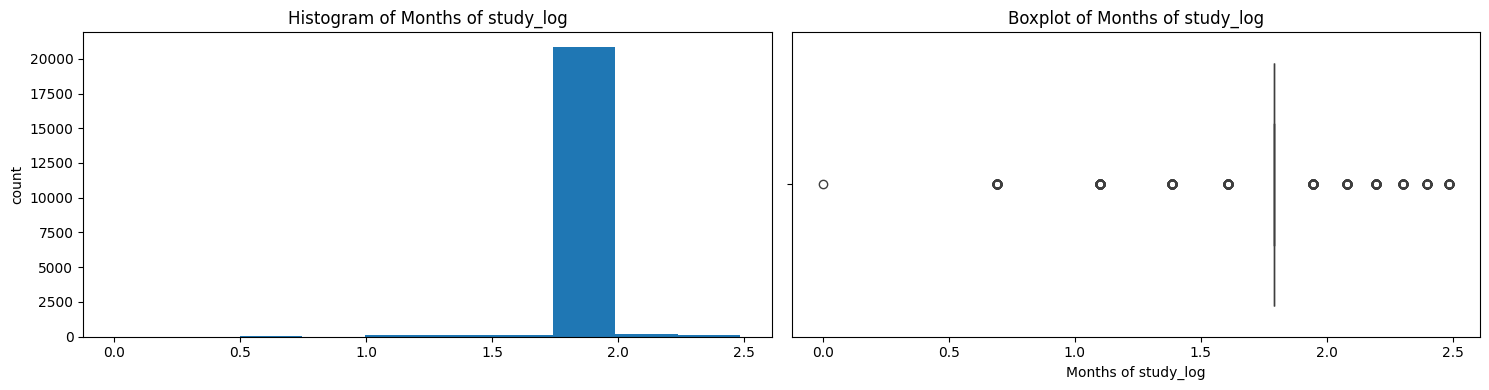

Course duration_log


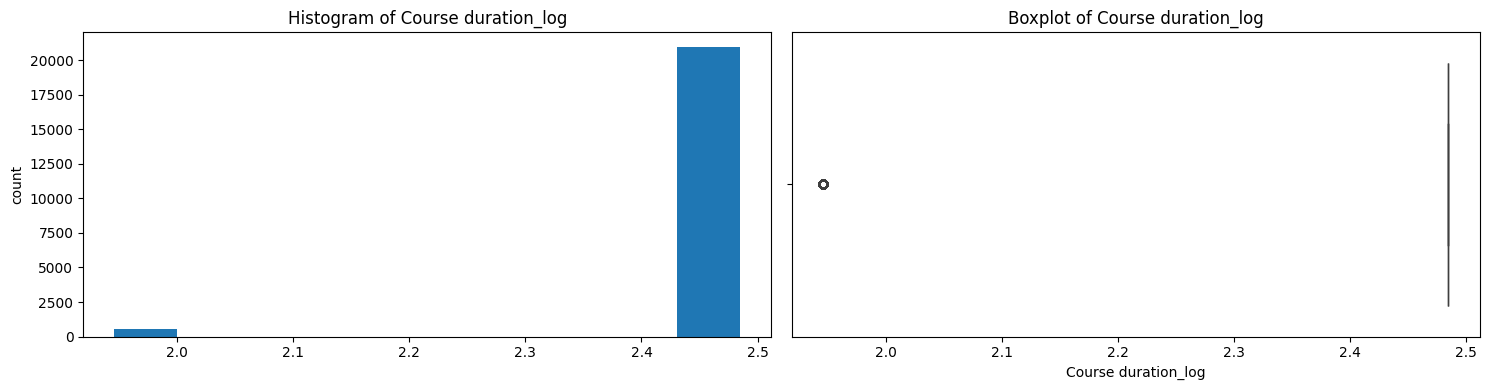

In [ ]:
log_columns = ['Offer_Total_Amount_log', 'Initial_Amount_Paid_log', 'Months of study_log', 'Course duration_log']

for col in log_columns:
    print(col)
    plt.figure(figsize=(15, 4))

    # Гистограмма для логарифмированного столбца
    plt.subplot(1, 2, 1)  # 1 строка, 2 колонки, 1-я ячейка
    deals[col].hist(grid=False)
    plt.ylabel('count')
    plt.title(f'Histogram of {col}')

    # Боксплот для логарифмированного столбца
    plt.subplot(1, 2, 2)  # 1 строка, 2 колонки, 2-я ячейка
    sns.boxplot(x=deals[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()  # Оптимизация отступов
    plt.show()

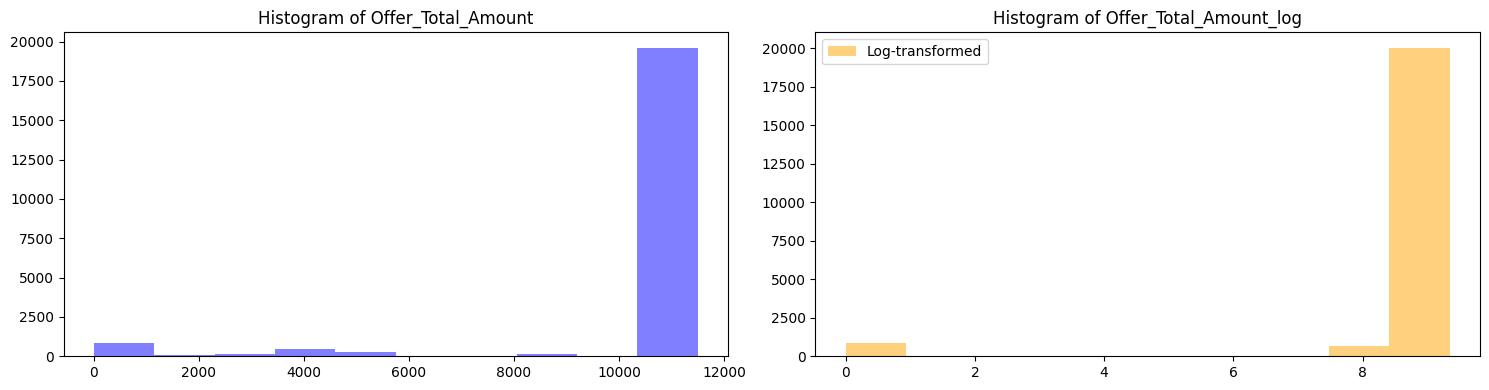

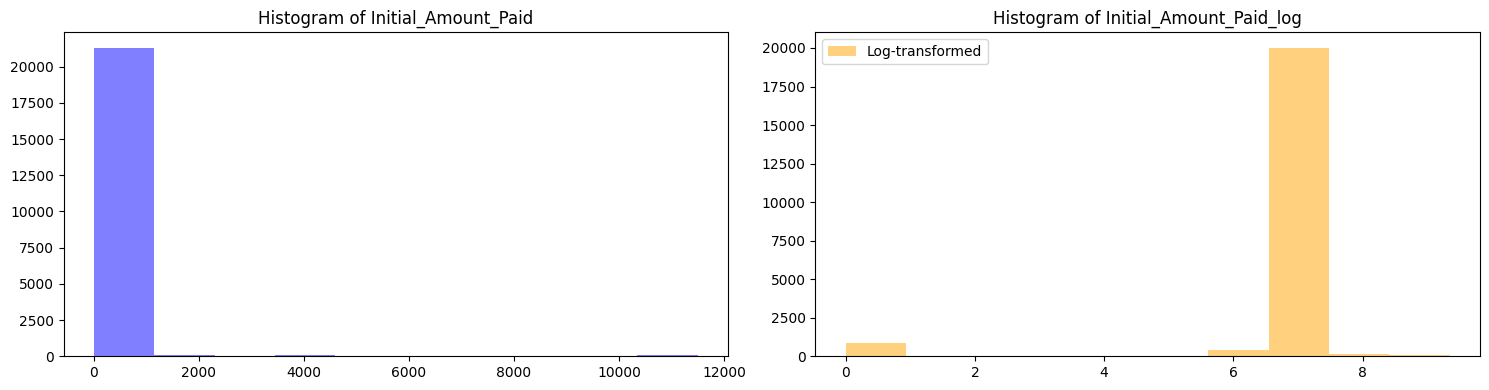

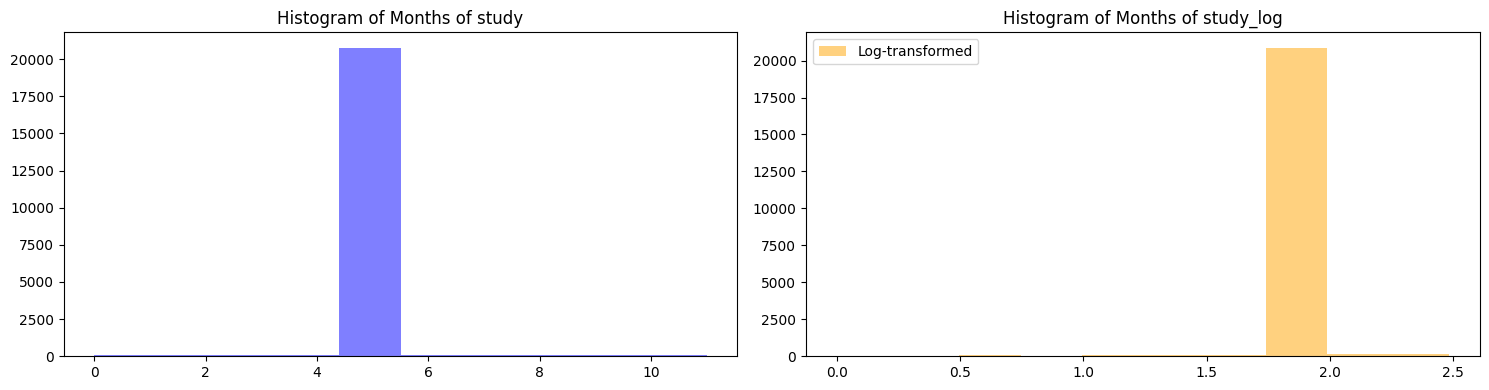

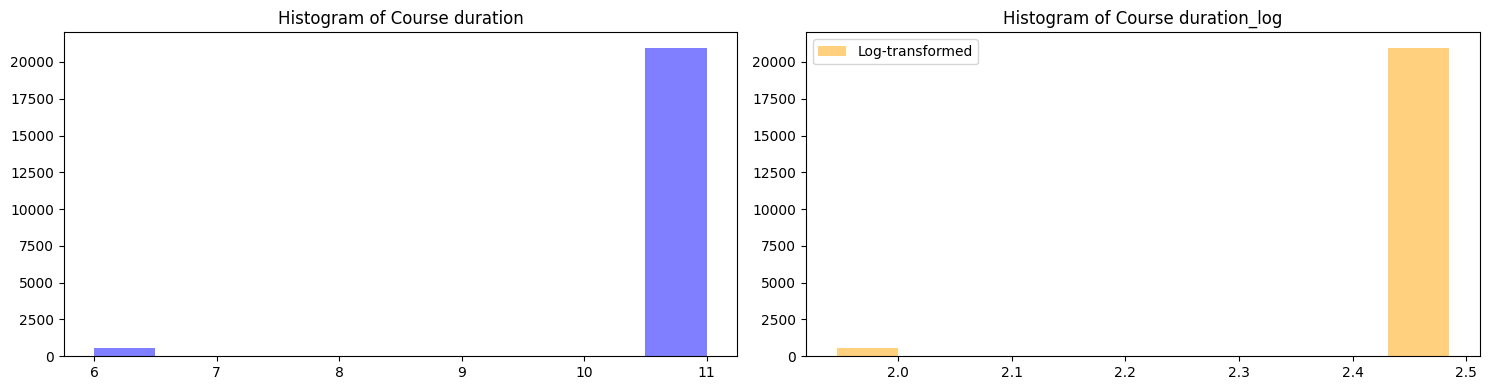

In [ ]:
for col in ['Offer_Total_Amount', 'Initial_Amount_Paid', 'Months of study', 'Course duration']:
    plt.figure(figsize=(15, 4))

    # Исходные данные
    plt.subplot(1, 2, 1)
    deals[col].hist(grid=False, alpha=0.5, color='blue', label='Original')
    plt.title(f'Histogram of {col}')

    # Логарифмированные данные
    plt.subplot(1, 2, 2)
    deals[col + '_log'].hist(grid=False, alpha=0.5, color='orange', label='Log-transformed')
    plt.title(f'Histogram of {col}_log')

    plt.legend()
    plt.tight_layout()
    plt.show()

Вывод: в данных слижком много пропущенных значений, логарифмирование не существенно помогло и изменило ситуацию

In [ ]:
# Рассчитываем корреляционную матрицу для числовых столбцов Course duration, Months of study, Initial_Amount_Paid, Offer_Total_Amount
subset_calls = deals[['Course duration', 'Months of study', 'Initial_Amount_Paid', 'Offer_Total_Amount']]

correlation_matrix = subset_calls.corr()

print(correlation_matrix)

                     Course duration  Months of study  Initial_Amount_Paid  \
Course duration             1.000000         0.094889            -0.022486   
Months of study             0.094889         1.000000            -0.061240   
Initial_Amount_Paid        -0.022486        -0.061240             1.000000   
Offer_Total_Amount          0.296269        -0.012183             0.251897   

                     Offer_Total_Amount  
Course duration                0.296269  
Months of study               -0.012183  
Initial_Amount_Paid            0.251897  
Offer_Total_Amount             1.000000  


## **Выводы**:

# -- Course duration и Offer_Total_Amount (0.296269):
Существует умеренная положительная корреляция между длительностью курса и общей суммой предложения. Это означает, что увеличение продолжительности курса, как правило, связано с увеличением суммы, предложенной студентам.

# -- Months of study и Offer_Total_Amount (-0.012183):
Корреляция между месяцами обучения и общей суммой предложения практически равна нулю. Это указывает на то, что нет заметной связи между количеством месяцев обучения и суммой предложения.


# -- Initial_Amount_Paid и Offer_Total_Amount (0.251897):
Существует умеренная положительная корреляция между первоначально оплаченной суммой и общей суммой предложения. Это говорит о том, что студенты, которые платят большую первоначальную сумму, как правило, также имеют более высокую общую сумму предложения.

# -- Course duration и Months of study (0.094889):
Очень слабая положительная корреляция. Это говорит о том, что между длительностью курса и количеством месяцев обучения существует очень незначительная связь.

# --Course duration и Initial_Amount_Paid (-0.022486):
Очень слабая отрицательная корреляция, что указывает на отсутствие значимой связи между этими двумя переменными.

# -- Months of study и Initial_Amount_Paid (-0.061240):
Слабая отрицательная корреляция, показывающая, что между количеством месяцев обучения и первоначальной оплатой нет значительной связи


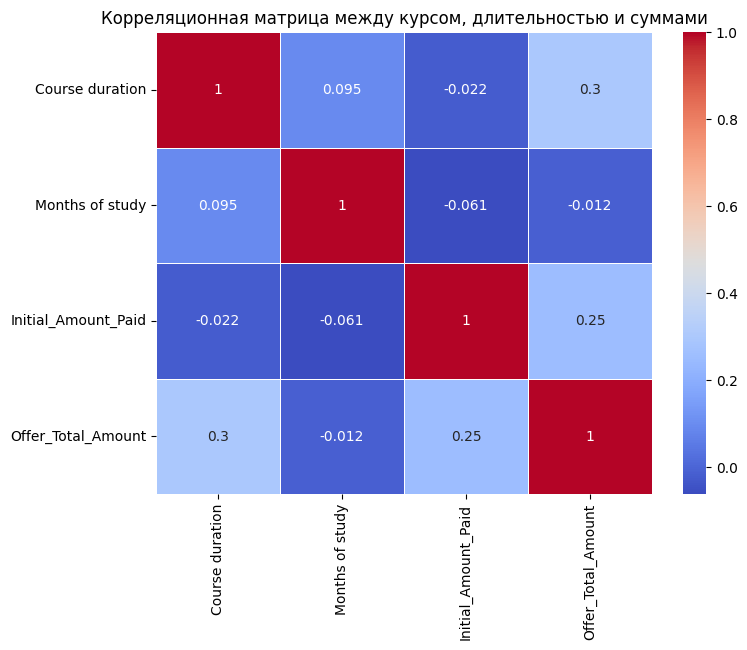

In [ ]:
# Построим тепловую карту корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица между курсом, длительностью и суммами')
plt.show()

Визуализация категориальных переменных

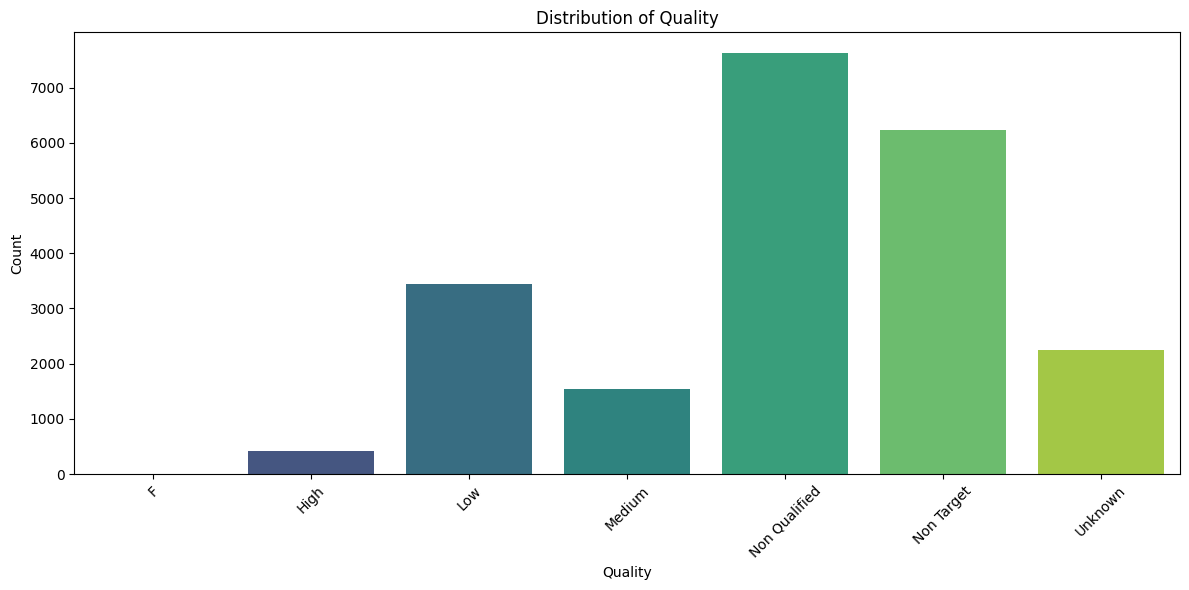

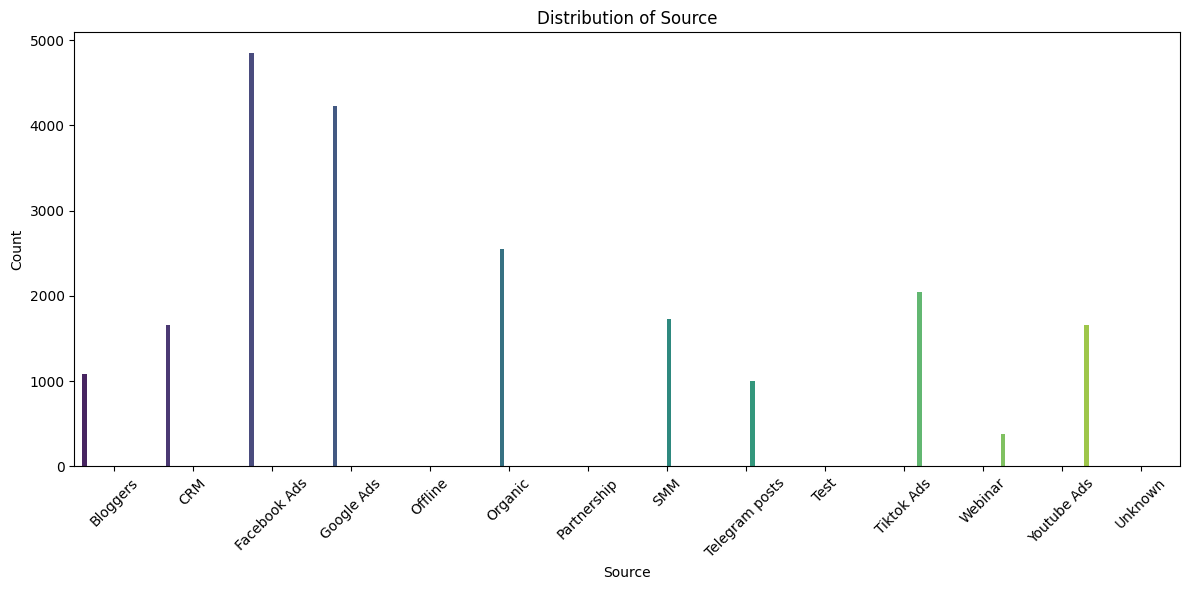

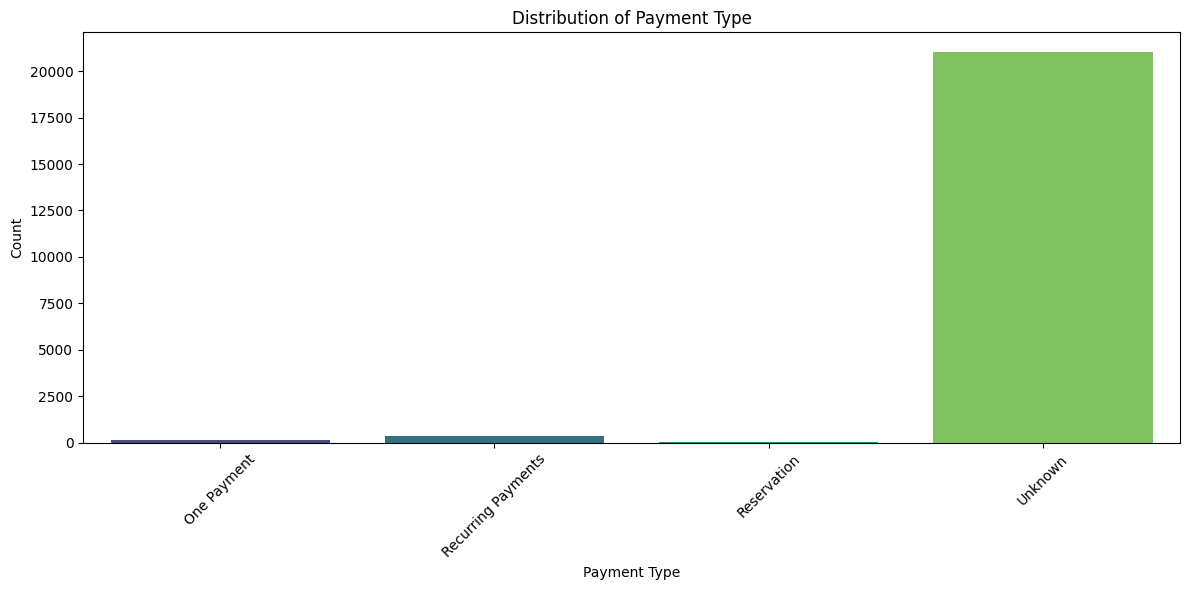

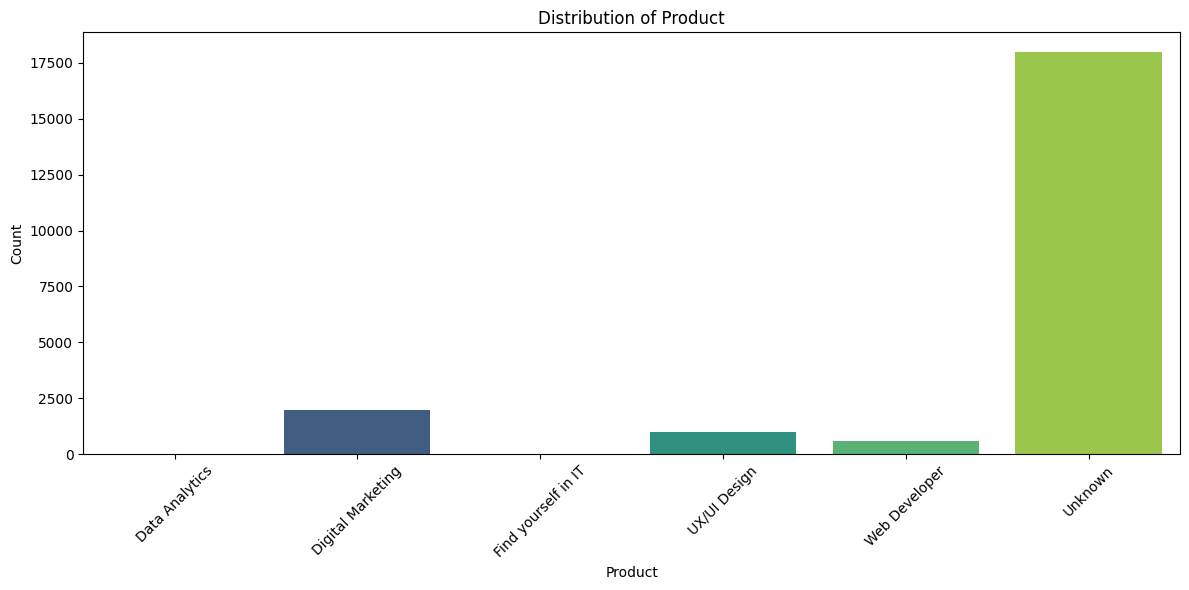

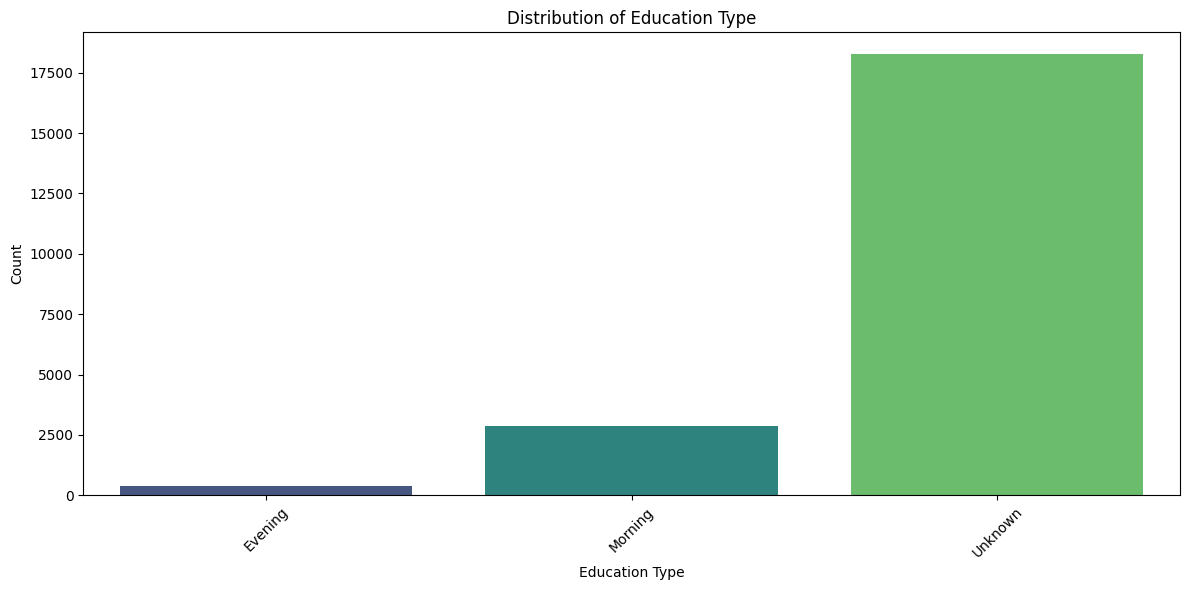

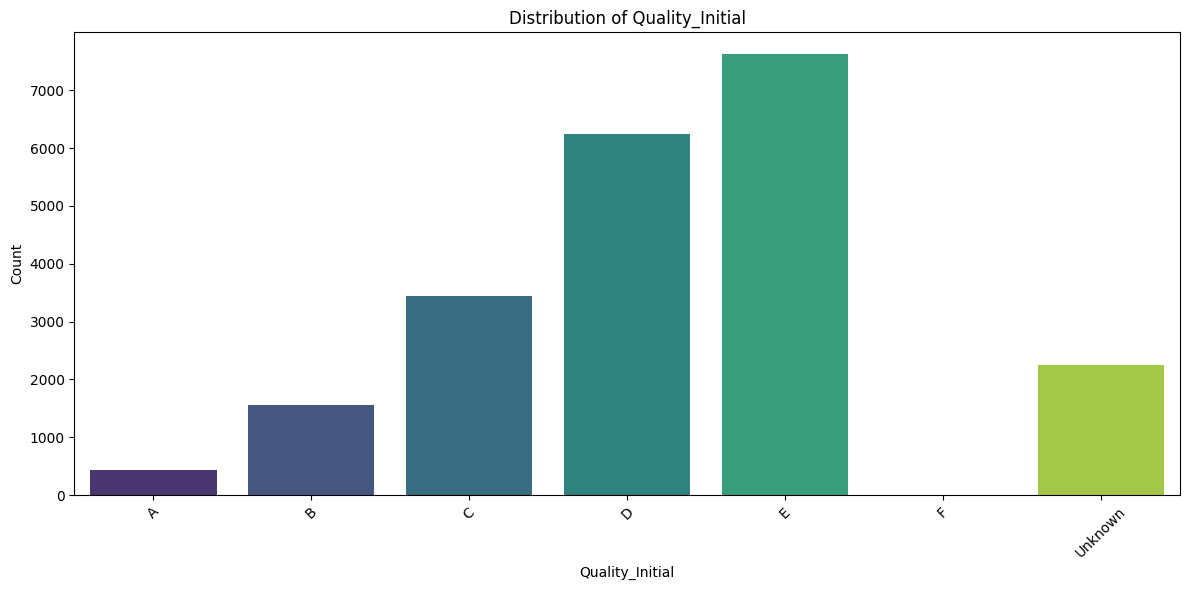

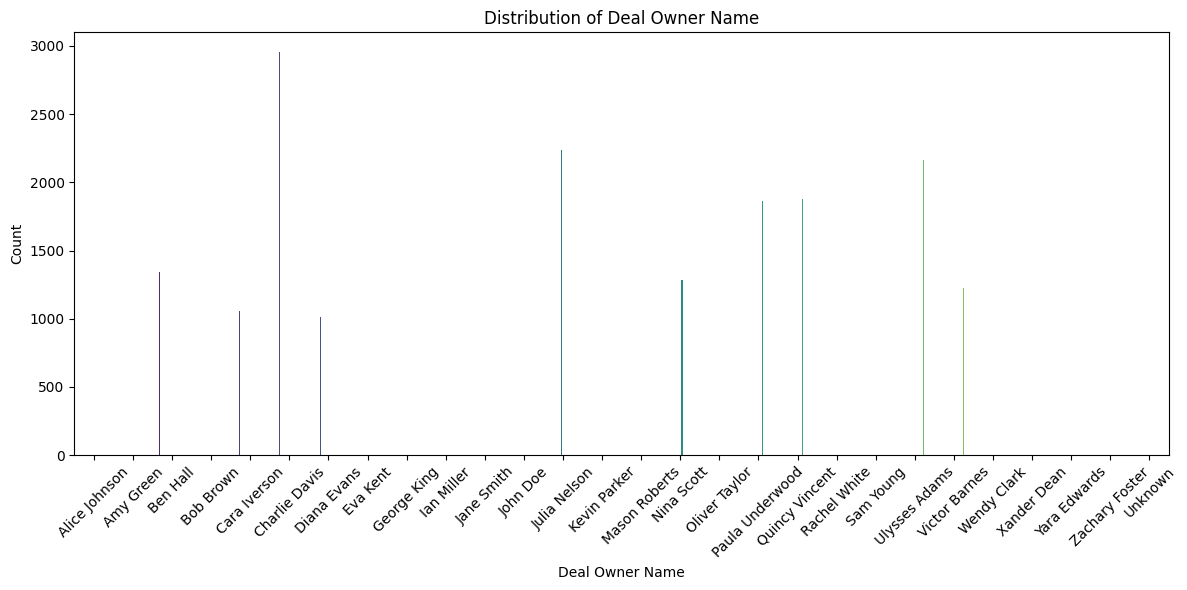

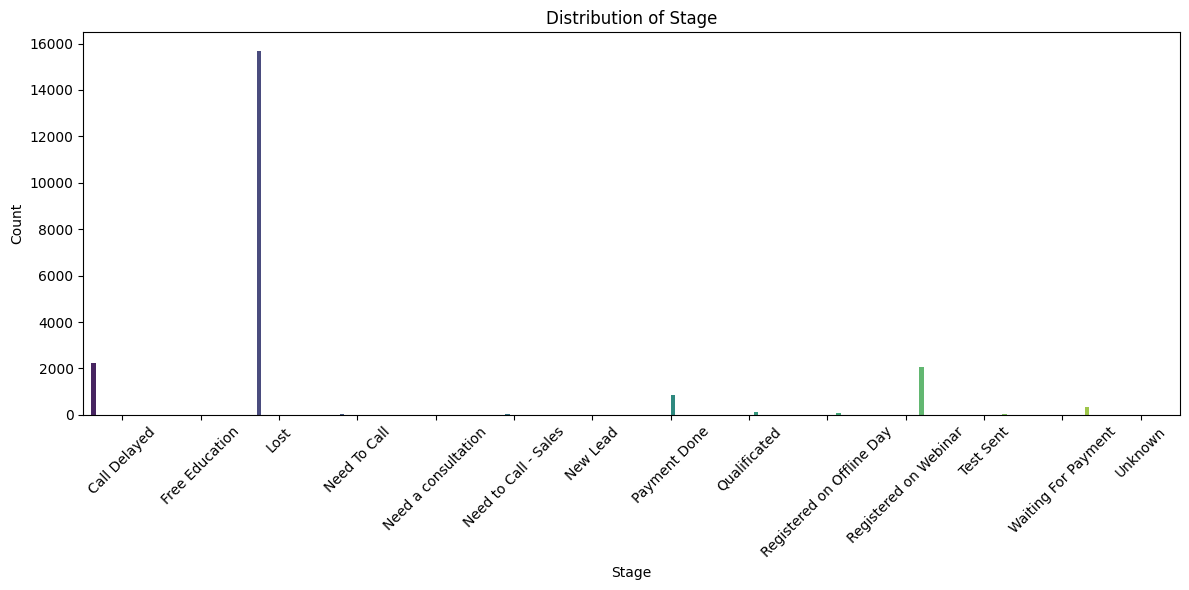

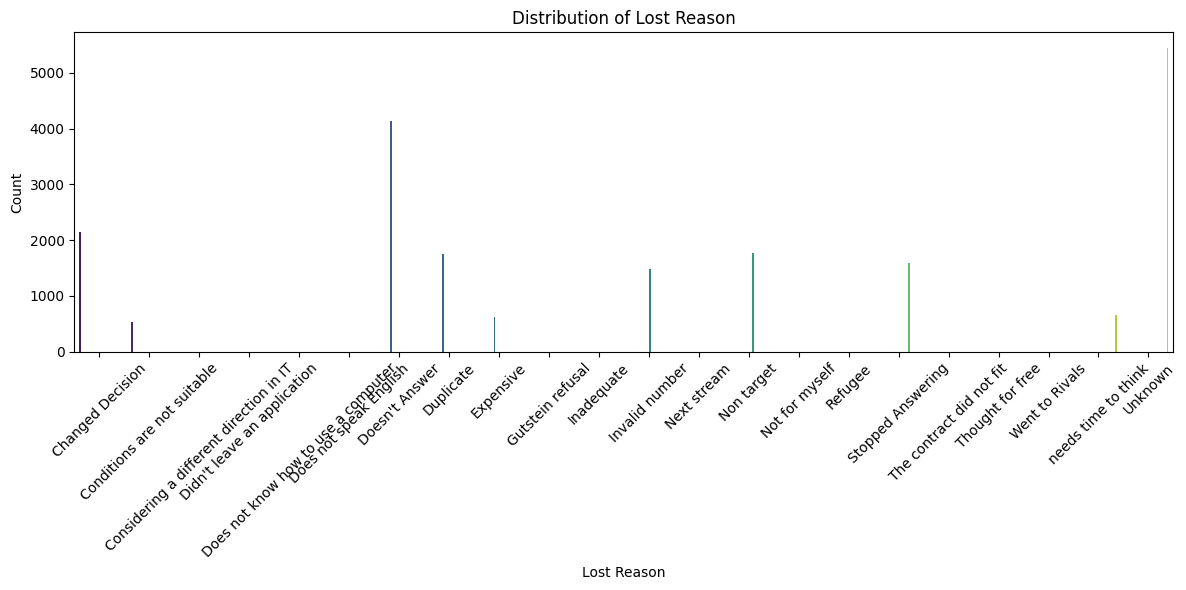

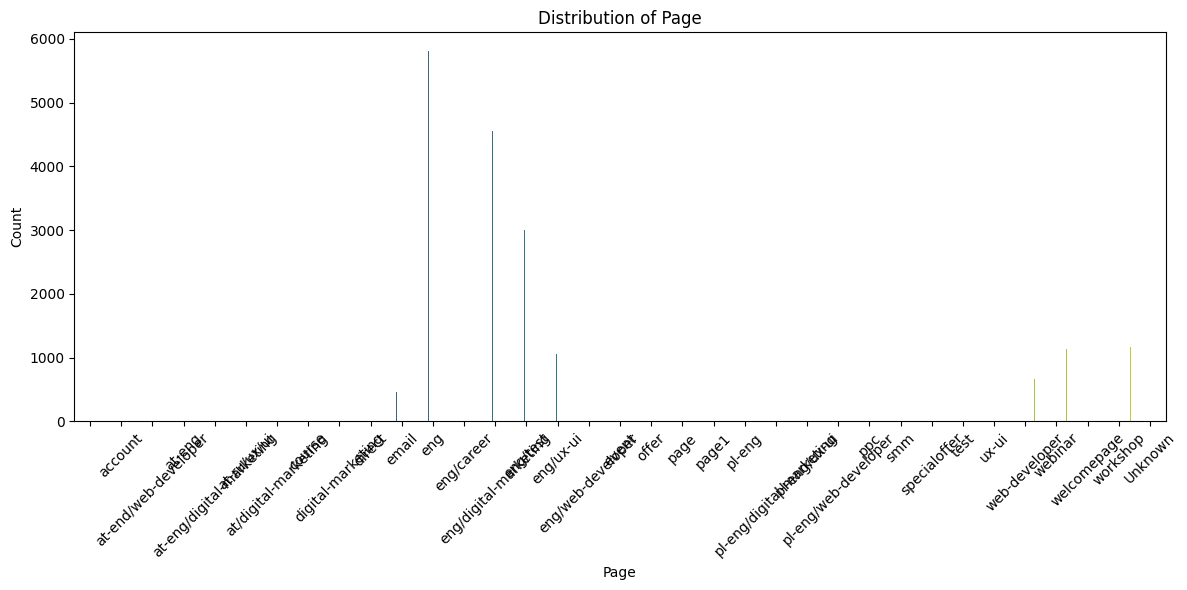

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, у вас есть DataFrame deals
categorical_columns = ['Quality', 'Source',
                       'Payment Type', 'Product', 'Education Type',
                       'Quality_Initial', 'Deal Owner Name', 'Stage', 'Lost Reason', 'Page']

# Создайте подмножество категорий для визуализации
for col in categorical_columns:
    plt.figure(figsize=(12, 6))

    # Построение столбчатой диаграммы для первых 10 значений
    top_categories = deals[col].value_counts().nlargest(10)  # Топ-10 категорий

    # Используем 'hue' для указания 'x', если необходимо
    sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette='viridis', legend=False)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

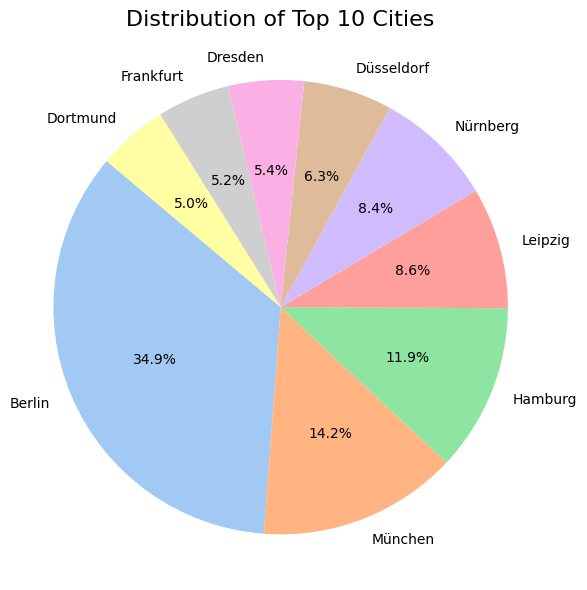

In [ ]:
city_counts = deals['City_Top'].value_counts()
top_cities = city_counts[(city_counts.index != 'Other') & (city_counts.index != '-') & (city_counts.index != 'Unknown') ].nlargest(10)  # исключаем 'Other' и берём только 10 распространённых городов

colors = sns.color_palette("pastel", len(top_cities))  # выбираем цвет

# Настройка графика
plt.figure(figsize=(6, 6))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Заголовок
plt.title('Distribution of Top 10 Cities', fontsize=16)
plt.axis('equal')      # Уравнивает оси, чтобы круговая диаграмма была кругом
plt.tight_layout()
plt.show()

## **Выводы**:

-- С 34,9 % студентов, **Берлин** является явным лидером, привлекая почти в два раза больше студентов, чем второй по популярности город.

-- **Мюнхен** и **Гамбург** являются вторым и третьим по популярности городами, с 14,2% и 11,9% студентов соответственно.
Другие города имеют меньшую долю: Остальные семь городов, включая Лейпциг, Нюрнберг и Дюссельдорф, каждый представляют относительно небольшую долю общей студенческой популяции.

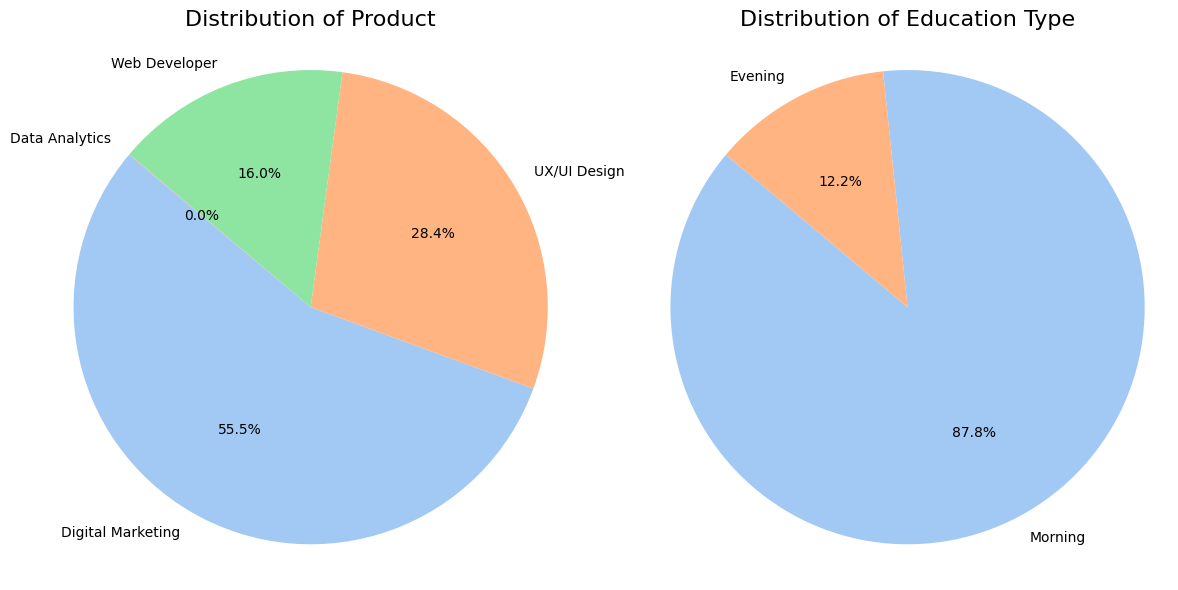

In [ ]:
# Подготовка данных для графика распределения продуктов
product_counts = deals['Product'].value_counts()
product_filter = product_counts[(product_counts.index != 'Unknown') & (product_counts.index != 'Find yourself in IT')]

# Подготовка данных для графика распределения типов образования
education_counts = deals['Education Type'].value_counts()
education_filter = education_counts[education_counts.index != 'Unknown']

# Настройка фигуры сдвумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Первый пирог - Распределение типов продуктов
colors1 = sns.color_palette("pastel", len(product_filter))  # выбираем цвет
ax1.pie(product_filter, labels=product_filter.index, autopct='%1.1f%%', startangle=140, colors=colors1)
ax1.set_title('Distribution of Product', fontsize=16)
ax1.axis('equal')  # Уравнивает оси, чтобы круговая диаграмма была кругом

# Второй пирог - Распределение типов образования
colors2 = sns.color_palette("pastel", len(education_filter))  # выбираем цвет
ax2.pie(education_filter, labels=education_filter.index, autopct='%1.1f%%', startangle=140, colors=colors2)
ax2.set_title('Distribution of Education Type', fontsize=16)
ax2.axis('equal')  # Уравнивает оси, чтобы круговая диаграмма была кругом

# Общая настройка
plt.tight_layout()
plt.show()

## **Выводы**:


# -- Distribution of Product - (Распределение продуктов):

 • Самый популярный продукт — это Digital Marketing, который занимает 55.5% от общего числа. Это означает, что большинство участников или клиентов выбрали эту программу.
 • UX/UI Design занимает второе место с долей 28.4%.
 •  Web Developer составляет 16.0%, что также является значимой частью.
 • Продукт  Data Analytics имеет 0.0%, что означает отсутствие участников или клиентов для этого направления.

# -- Distribution of Education Type (Распределение типов обучения):

 • Утренний формат обучения (Morning) является доминирующим и составляет 87.8% от общего числа. Это говорит о том, что большинство участников предпочитает утренние занятия.
 • Вечерний формат обучения (Evening) выбирает 12.2% людей, что значительно меньше.

Общие выводы:

 • Digital Marketing — это наиболее популярный продукт, что может говорить о его актуальности и востребованности на рынке.
 • Утренний формат обучения явно более популярен, что может указывать на удобство такого расписания для большинства участников.
 • Низкий интерес к продукту Data Analytics (0%) может указывать на необходимость пересмотра или улучшения этой программы, или на то, что она не так актуальна для аудитории в данном контексте.


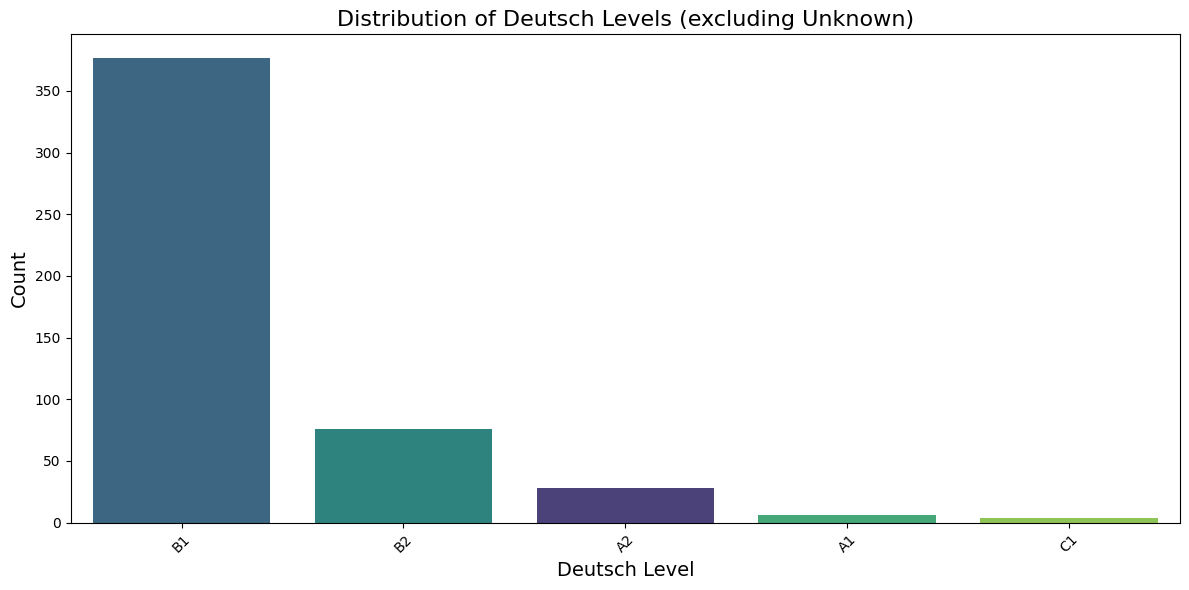

In [ ]:
plt.figure(figsize=(12, 6))

# Фильтрация данных без 'Unknown'
filtered_data = deals[deals['Deutsch_Level'] != 'Unknown']

# Построение графика countplot с добавлением параметра hue
sns.countplot(data=filtered_data, x='Deutsch_Level', hue='Deutsch_Level', order=filtered_data['Deutsch_Level'].value_counts().index, palette='viridis', legend=False)

# Настройка графика
plt.title('Distribution of Deutsch Levels (excluding Unknown)', fontsize=16)
plt.xlabel('Deutsch Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Выводы**:

Наибольшее количество людей (более 350 человек) владеют языком на уровне B1.

Заметно меньше людей (около 75) имеют уровень B2.

Ещё меньше людей (около 30) владеют немецким на уровне A2.

На уровнях A1 и C1 количество людей примерно одинаковое и не превышает 10 человек.

Таким образом, данные графика говорят о том, что среди опрошенных наиболее распространенным является уровень владения немецким языком B1.
